In [3]:
import tensorflow  as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

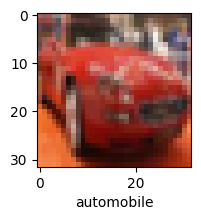

In [14]:
plot_sample(X_train, y_train, 5)

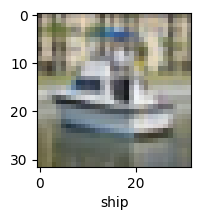

In [15]:
plot_sample(X_train, y_train, 501)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
ann = models.Sequential([
    layers.Input(shape=(32,32,3)),  # Explicit Input layer
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
from tensorflow.keras.losses import SparseCategoricalCrossentropy

ann.compile(optimizer='SGD',
            loss=SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.3015 - loss: 1.9351
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.4179 - loss: 1.6490
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.4554 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.4797 - loss: 1.4830
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.4940 - loss: 1.4405


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.56      0.49      0.52      1000
           1       0.71      0.45      0.55      1000
           2       0.32      0.47      0.38      1000
           3       0.32      0.43      0.37      1000
           4       0.46      0.37      0.41      1000
           5       0.41      0.31      0.35      1000
           6       0.48      0.60      0.53      1000
           7       0.71      0.36      0.48      1000
           8       0.52      0.70      0.59      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [39]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show 

In [ ]:
cnn = models.Sequential([
    layers.Input(shape=(32,32,3)),  # Explicit Input layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [42]:
cnn.compile(optimizer ='adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [43]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 58ms/step - accuracy: 0.7590 - loss: 0.7004
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.7689 - loss: 0.6623 
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.7828 - loss: 0.6193 
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7953 - loss: 0.5820 
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8069 - loss: 0.5447
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8225 - loss: 0.5100
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8344 - loss: 0.4785
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8432 - loss: 0.4412
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8572 - loss: 0.4062
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8592 - loss: 0.3994


In [44]:
cnn.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6792 - loss: 1.1405


[1.1405068635940552, 0.6840999722480774]

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step 


array([[3.03867228e-06, 2.60643503e-07, 9.69906068e-06, 9.82913077e-01,
        1.83866950e-06, 1.63895469e-02, 6.80323981e-04, 2.11840657e-07,
        1.00028706e-06, 9.46298030e-07],
       [4.88572270e-02, 2.09340423e-01, 2.56481271e-05, 8.79259233e-07,
        4.76112473e-06, 9.02381146e-07, 4.95639574e-09, 5.64725269e-07,
        7.41514444e-01, 2.55205436e-04],
       [2.30919123e-01, 4.86198246e-01, 3.15189449e-04, 8.25929735e-03,
        1.18108488e-04, 3.40407970e-03, 1.82974487e-04, 1.45740788e-02,
        3.39501980e-03, 2.52633840e-01],
       [8.38019609e-01, 4.44877605e-06, 1.50278375e-01, 9.50686052e-04,
        9.99821350e-03, 1.01056976e-04, 1.72572231e-06, 8.12392827e-05,
        4.39518975e-04, 1.25112230e-04],
       [6.37758513e-09, 2.92062445e-08, 5.77211846e-04, 3.04091373e-03,
        8.71172488e-01, 8.39204076e-05, 1.25120074e-01, 2.50044385e-09,
        5.25451833e-06, 3.79488489e-11]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

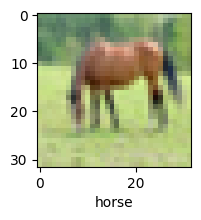

In [52]:
plot_sample(X_test, y_test,60)

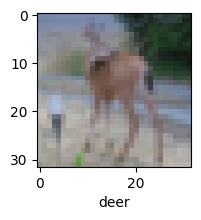

In [49]:
plot_sample(X_test, y_test,100)

In [53]:
classes[y_classes[60]]

'horse'